In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#need to mix up patients 
X_data = pd.read_csv ('Data_RISE.csv',engine='python') 
Y = pd.read_csv ('RISE_PCA_data.csv',engine='python')
Y_data = Y[['Trauma Group']].copy()
del Y['Trauma Group']
X_data.columns = Y.columns

X_data

,Age,Sex,Exercise pre,Number of TBI,Years post TBI,LOC,LOC duration,PTA,ISI pre,SHI pre,...,CV_IL6_base,Final_Conc_IL6_fu,CV_IL6_Fu,Final_Conc_IL10_base,CV_IL10_base,Final_Conc_IL10_fu,CV_IL10_fu,Final_Conc_TNFa_base,CV_TNFa_Base,Final_Conc_TNFa_fu
0,42.0,0.0,3.0,1.0,19.0,1.0,60.00,0.0,16.0,6.0,...,0.06280,1.575,0.02760,0.380,0.03740,0.360,0.00850,2.315,0.03040,2.340
1,70.0,0.0,4.0,1.0,20.0,0.0,2.75,0.0,10.0,17.0,...,0.01230,2.500,0.00280,0.510,0.03100,0.610,0.02000,3.450,0.05610,3.540
2,70.0,0.0,3.0,1.0,51.0,1.0,0.50,0.0,4.0,12.0,...,0.06260,0.970,0.05510,0.710,0.02270,0.680,0.01510,3.150,0.06400,3.030
3,72.0,0.0,2.0,1.0,15.0,0.0,32.50,0.0,8.0,12.0,...,0.06570,2.020,0.00930,0.480,0.04110,0.440,0.00120,2.670,0.04460,2.590
4,82.0,0.0,4.0,5.0,49.0,0.0,5.00,0.0,11.0,7.0,...,0.07000,3.040,0.05570,0.630,0.04510,0.640,0.02850,5.350,0.05800,5.140
5,69.0,0.0,4.0,2.0,48.0,1.0,120.00,0.0,16.0,22.0,...,0.01210,1.810,0.00910,0.590,0.05980,0.510,0.02120,2.930,0.01520,3.560
6,71.0,0.0,3.0,4.0,53.0,1.0,10.00,0.0,18.0,11.0,...,0.01120,1.630,0.03120,0.610,0.03370,0.550,0.00250,3.730,0.02180,2.990
7,44.0,0.0,3.0,2.0,9.0,0.0,31.00,0.0,7.0,17.0,...,0.01330,2.120,0.01240,0.600,0.03900,0.700,0.01950,2.290,0.01210,2.340
8,40.0,0.0,4.0,1.0,28.0,0.0,3630.00,0.0,6.0,15.0,...,0.05990,1.130,0.04590,0.280,0.03370,0.280,0.01580,1.960,0.01620,2.090
9,69.0,0.0,3.0,1.0,18.0,1.0,5.00,0.0,11.0,21.0,...,0.03900,2.260,0.00605,0.495,0.03605,0.525,0.01060,3.060,0.05035,3.065


In [92]:
Y_data = Y_data.iloc[1: , :]
Y_data

,Trauma Group
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


## Use Random Forest for variable selection

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)

In [95]:
feature_names = [f"feature {i}" for i in range(X_data.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

/Users/emmamaliar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [96]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

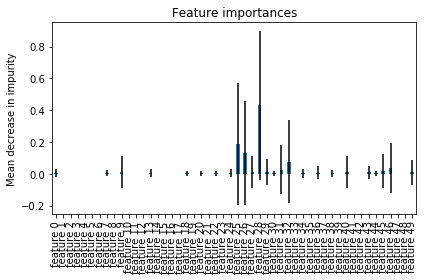

In [97]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [98]:
colname = "Most important features for PTSD vs TBI classification: "
colname += X_data.columns[25] + ", " 
colname += X_data.columns[26] + ", " 
colname += X_data.columns[28] + ", " 
colname += X_data.columns[32] + ", "
colname 

'Most important features for PTSD vs TBI classification: PCL pre, NSI pre, EDA pre, WHODAS pre %, '

In [99]:
X_data.columns

Index(['Age', 'Sex', 'Exercise pre', 'Number of TBI', 'Years post TBI', 'LOC',
       'LOC duration', 'PTA', 'ISI pre', 'SHI pre', 'pre Bedtime (24)',
       'pre Bedtime Variance (SD)', 'pre Waketime (24)',
       'pre Waketime Variance (SD)', 'preMidsleep (24)', 'pre Time in bed',
       'pre TIB min', 'pre TST', 'pre TST min', 'pre SOL', 'pre SE',
       'pre WASO', 'pre #Awakenings', 'pre Activity', 'pre AC/epoch',
       'PCL pre', 'NSI pre', 'PHQ pre', 'EDA pre', 'Pain interference pre',
       'Pain intensity pre', 'WHODAS pre', 'WHODAS pre %', 'GFAP Con Pre',
       'GFAP CV Pre', 'NFL Con Pre', 'NFL CV Pre', 'Tau Con Pre', 'Tau CV Pre',
       'Final_Conc_IL6_base', 'CV_IL6_base', 'Final_Conc_IL6_fu', 'CV_IL6_Fu',
       'Final_Conc_IL10_base', 'CV_IL10_base', 'Final_Conc_IL10_fu',
       'CV_IL10_fu', 'Final_Conc_TNFa_base', 'CV_TNFa_Base',
       'Final_Conc_TNFa_fu'],
      dtype='object')